In [1]:
## Importing packages
library(tidyverse) # metapackage with lots of helpful functions
library(ggplot2)
library(scales)
library(countrycode)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



In this analysis, I will try to use the [tidyverse style](http://style.tidyverse.org/) for coding. Since I am new to it, I will try to use it for as much code as possible. Let's start by reading the data as a tibble (I prefer tibbles over data frames as they are much easier to read and handle).

In [2]:
## Reading in the file
agora = read_csv("Agora.csv.zip")

Parsed with column specification:
cols(
  Vendor = col_character(),
  Category = col_character(),
  Item = col_character(),
  `Item Description` = col_character(),
  Price = col_character(),
  Origin = col_character(),
  Destination = col_character(),
  Rating = col_character(),
  Remarks = col_character()
)


In [3]:
dim(agora)

[1] 109689      9

In [4]:
head(agora)

Vendor,Category,Item,Item Description,Price,Origin,Destination,Rating,Remarks
CheapPayTV,Services/Hacking,12 Month HuluPlus gift Code,12-Month HuluPlus Codes for $25. They are worth $95. They will be sent to you within 1 day. Most within a hour or two,0.05027025666666667 BTC,Torland,NA,4.96/5,NA
CheapPayTV,Services/Hacking,Pay TV Sky UK Sky Germany HD TV and much more.. CCcam Service 12 Months,Hi we offer a World Wide CCcam Service for Enigma 2 devices! 12 Months 75$ Following Satellites are available: SKY UK Sky Germany HD Sky italia HD Cyfra HD Nova HD Polsat HD Euros ...,0.152419585 BTC,Torland,NA,4.96/5,NA
KryptykOG,Services/Hacking,OFFICIAL Account Creator Extreme 4.2,Tagged Submission Fix Bebo Submission Fix Adjustments To Inbox.com Submission Linkedin Now Saves Email Fixed Typo Fixed Task Manager Form Issue Features- Automatically Creates Accounts On 20 ...,0.007000000000000005 BTC,Torland,NA,4.93/5,NA
cyberzen,Services/Hacking,VPN > TOR > SOCK TUTORIAL,How to setup a VPN > TOR > SOCK super safe encrypted connection.,0.019016783532494728 BTC,NA,NA,4.89/5,NA
businessdude,Services/Hacking,Facebook hacking guide,. This guide will teach you how to hack Facebook accounts of (your ex/friends/foe etc.) in a fast way! with practically useful methods. Perfect for those new to this field. Straight forward and to ...,0.062018073963963936 BTC,Torland,NA,4.88/5,NA
Hackyboy,Services/Hacking,DDOS ATTACK SERVICE,New service available : Take down all websites you want : Skype accounts Minecraft servers xbox game servers... and many more... (not biggest websites like Facebook Google ... you understand why. ...,0.030109432452830192 BTC,Torland,NA,4.92/5,NA


Let us find out the columns with missing values before we start using the data directly in our analysis. This will help us avoid errors we may run into while handling columns with missing values without knowing about it.

In [5]:
colnames(agora)[colSums(is.na(agora)) > 0]

[1] "Item"             "Item Description" "Price"            "Origin"          
[5] "Destination"      "Rating"           "Remarks"

All the columns except _Vendor_ and _Category_ contain some missing values. Let's look at how many different vendors we have in our data.

In [6]:
length(unique(agora$Vendor))

[1] 3192

That's a lot of vendors there! Let's try to figure out the top 15 vendors by the number of listings in the dataset.

In [7]:
(top_15_listings <- agora %>% 
    group_by(Vendor) %>% 
    summarise(Listings = n()) %>% 
    top_n(15) %>% 
    arrange(desc(Listings)))

Selecting by Listings


Vendor,Listings
optiman,881
sexyhomer,860
mssource,823
profesorhouse,804
RXChemist,729
rc4me,648
fake,608
medibuds,604
Gotmilk,479
Bigdeal100,451


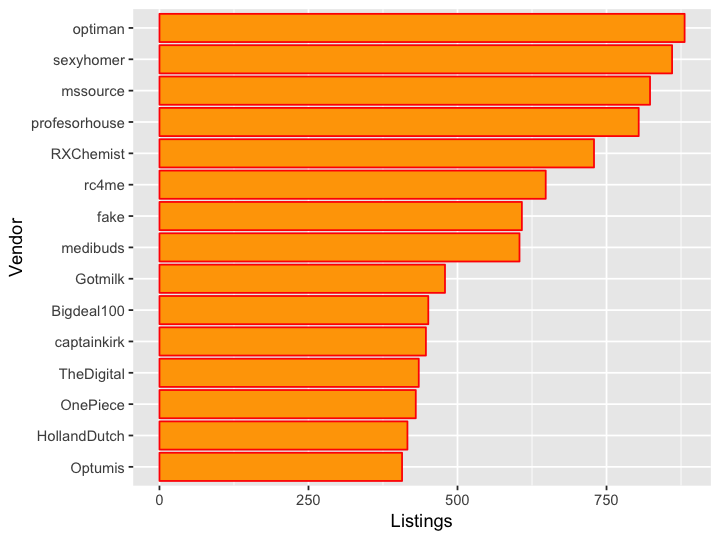

In [8]:
options(repr.plot.width = 6, repr.plot.height = 4.5)
top_15_listings %>% 
    ggplot(aes(reorder(Vendor, Listings), Listings)) +
    geom_bar(fill = "orange", colour = "red", stat = "identity") +
    xlab("Vendor") +
    coord_flip()

We see that some vendors like **optiman** **sexyhomer** **mssource** and **profesorhouse** have the highest number of listings on Agora. Probably they are the ones with the largest customer base and with the greatest control over the market! Let's look at some of the categories in which the dark market has the largest . Any guesses? You are probably right! 

In [9]:
(top_15_category <- agora %>% 
    group_by(Category) %>% 
    summarise(Count_Category = n()) %>% 
    arrange(desc(Count_Category)) %>% 
    top_n(15))

Selecting by Count_Category


Category,Count_Category
Drugs/Cannabis/Weed,21272
Drugs/Ecstasy/Pills,7534
Drugs/Ecstasy/MDMA,6116
Drugs/Stimulants/Cocaine,6007
Drugs/Prescription,5561
Drugs/Benzos,5393
Drugs/Cannabis/Concentrates,4257
Drugs/Psychedelics/LSD,3775
Drugs/Cannabis/Hash,3241
Drugs/Steroids,2779


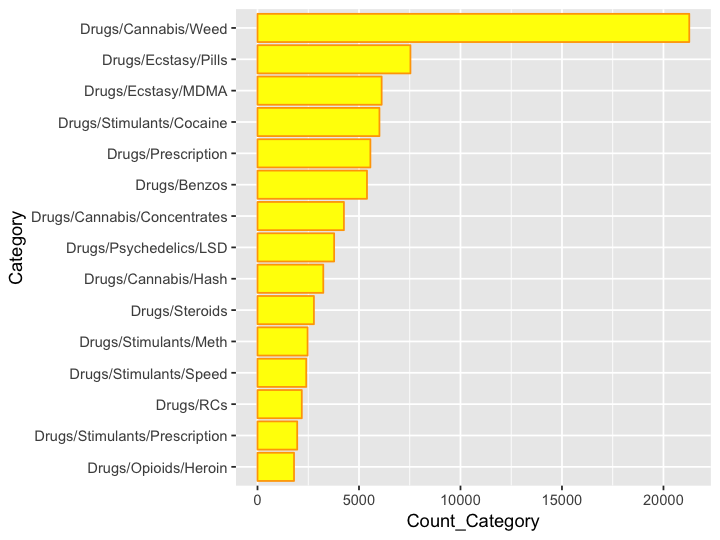

In [10]:
top_15_category %>% 
    ggplot(aes(reorder(Category, Count_Category), Count_Category)) +
    geom_bar(fill = "yellow", colour = "orange", stat = "identity") +
    xlab("Category") +
    coord_flip()

Weed takes it away by a far greater margin than any other sub-category.  Let us try to see how much percentage share of market do these categories take in order to understand this comparison with numbers.

In [11]:
(top_15_category <- top_15_category %>% 
    mutate(Share = Count_Category/sum(Count_Category)*100))

Category,Count_Category,Share
Drugs/Cannabis/Weed,21272,27.719573
Drugs/Ecstasy/Pills,7534,9.817566
Drugs/Ecstasy/MDMA,6116,7.969768
Drugs/Stimulants/Cocaine,6007,7.827730
Drugs/Prescription,5561,7.246547
Drugs/Benzos,5393,7.027626
Drugs/Cannabis/Concentrates,4257,5.547303
Drugs/Psychedelics/LSD,3775,4.919208
Drugs/Cannabis/Hash,3241,4.223352
Drugs/Steroids,2779,3.621319


Weed comprises of a massive 27.7% of the total market share of the top 15 categories on the dark market which may not be that surprising! Let us separate __Category__ into different columns __Category__,  __Sub_Category__, and __Product__.

In [12]:
agora <- agora %>% 
    separate(Category, into = c("Category", "Sub_Category", "Product"),
             sep = "/", fill = "warn")

Warning message:
“Expected 3 pieces. Additional pieces discarded in 276 rows [9339, 9340, 9341, 9342, 9343, 9344, 9345, 9346, 9347, 9348, 9349, 9350, 9351, 9352, 9353, 9354, 9355, 9356, 9357, 9358, ...].”Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 32361 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

In [13]:
# Distribution of different products over different categories
agora %>% 
    group_by(Category, Sub_Category) %>% 
    summarise(Count_Product = n()) %>% 
    arrange(desc(Count_Product))

Category,Sub_Category,Count_Product
Drugs,Cannabis,31166
Drugs,Ecstasy,14983
Drugs,Stimulants,12871
Drugs,Psychedelics,8341
Drugs,Opioids,6842
Drugs,Prescription,5561
Drugs,Benzos,5393
Drugs,Steroids,2779
Drugs,RCs,2182
Info,eBooks,2169


We can clearly see that the _Drug_ market takes all away. A slight eyeballing reveals that _Services_ and _Data_ category are also among the top after the King!

In [14]:
# Looking at the distribution of number of products in different categories
agora %>%  
    group_by(Category) %>% 
    summarise(Count = n()) %>% 
    arrange(desc(Count))

Category,Count
Drugs,93041
Services,2643
Counterfeits,2369
Info,2169
Data,2118
Information,1845
Other,1425
Forgeries,1051
Drug paraphernalia,840
Weapons,656


Let's look at the children knights of the king to see which one has the highest share for the King's wealth!

In [15]:
# Looking at the distribution of different categories of drugs
agora %>% 
    filter(Category == "Drugs") %>% 
    group_by(Sub_Category) %>% 
    summarise(Count_Product = n()) %>% 
    arrange(desc(Count_Product)) %>% 
    mutate(Share = Count_Product / sum(Count_Product) * 100)

Sub_Category,Count_Product,Share
Cannabis,31166,33.49706044
Ecstasy,14983,16.10365323
Stimulants,12871,13.83368622
Psychedelics,8341,8.96486495
Opioids,6842,7.35374727
Prescription,5561,5.97693490
Benzos,5393,5.79636934
Steroids,2779,2.98685526
RCs,2182,2.34520265
Dissociatives,1769,1.90131232


Cannbis leads the drug market with the largest share of 33.5 percent of all the drugs sold on the dark market. I am really curious to see the percentage of market share that Cannabis holds when compared to all the dark market. Let's try to figure it out!

In [16]:
agora %>% 
    group_by(Sub_Category) %>% 
    summarise(Count_Product = n()) %>% 
    arrange(desc(Count_Product)) %>% 
    mutate(Share = Count_Product / sum(Count_Product) * 100) %>% 
    filter(Share > 5)

Sub_Category,Count_Product,Share
Cannabis,31166,28.413059
Ecstasy,14983,13.659528
Stimulants,12871,11.734085
Psychedelics,8341,7.604226
Opioids,6842,6.237635
Prescription,5561,5.069788


See! What else did you expect? People are crazy about Cannabis on the drug market! Let's look at the distribution of some services below.

In [17]:
# Looking at the distribution of different categories of services
agora %>% 
    filter(Category == "Services") %>% 
    group_by(Sub_Category) %>% 
    summarise(Count_Product = n()) %>% 
    arrange(desc(Count_Product))

Sub_Category,Count_Product
Money,1481
Other,487
Hacking,453
Advertising,132
Travel,90


Seems okay.. Nothing groundbreaking as the Cannabis here. Let's move on to the Price now. I see there is a price and a currency asociated with it. I am guessing it's mostly in Bitcoin since it is online but let's get the answer from the data itself.

In [18]:
agora %>% 
    separate(Price, c("Price", "Currency"), " ") %>% 
    select(Currency) %>% 
    group_by(Currency) %>% 
    summarise(Count = n())


Warning message:
“Expected 2 pieces. Additional pieces discarded in 4 rows [56231, 56491, 58890, 107033].”Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 4 rows [17123, 20353, 34438, 55999].”

Currency,Count
"""Skywalker""",1
a,1
BTC,109675
deals],1
grams,1
is,1
NA,9


Indeed, the mode of currency is Bitcoin mostly! We can ignore the other entries (probably data entry error or someone was high on LSD while filling the data, you never know!).

In [19]:
agora <- agora %>% 
    separate(Price, c("Price", "Currency"), " ")

Warning message:
“Expected 2 pieces. Additional pieces discarded in 4 rows [56231, 56491, 58890, 107033].”Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 4 rows [17123, 20353, 34438, 55999].”

Now, I personally don't get an idea of the price in BTC since it is so volatile and it is better to have a price in a currency we understand and which is less volatile. So, let us go with USD and since the data obtained is from the period 2014 to 2015, let's take the average conversion rate between BTC and USD for that period which is 340$ approximately (a quick google search).

In [20]:
agora <- agora %>% 
    mutate(Price = as.numeric(Price) * 340, Currency = "USD") %>% 
    filter(!is.na(Price))

Warning message in evalq(as.numeric(Price) * 340, <environment>):
“NAs introduced by coercion”

Let us now try to plot the distribution of Price to get an idea of the mean price for all the stuff available on the dark web/market.

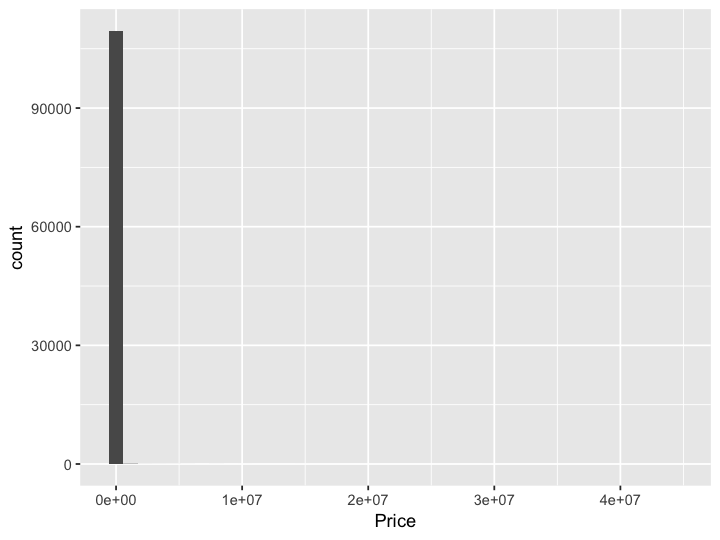

In [21]:
agora %>% 
    ggplot(aes(x = Price)) +
    geom_histogram(bins = 40)

Damn! I wasn't expecting this one bar histogram. I bet you weren't too. But this is the beauty of Exploratory Data Analysis. It helps us look and understand our data better without having to see and gauge a lot of numbers. We didn't need to compare the max price to the other prices in order to see here that there are a lot of products with less price and only a few with a really high price (as is expected). Let us see here what's going on and then try to make things more clear.

In [22]:
summary(agora$Price)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0       42      130     7535      452 44334670 

In [23]:
table(agora$Price > mean(agora$Price) + 6 * sd(agora$Price))


 FALSE   TRUE 
109622     54 

There are some serious outliers there in our dataset and I know what you're thinking. What is the that thing with such a high price? Let's figure it out!

In [24]:
agora %>% 
    filter(Price > mean(Price) + 6 * sd(Price)) %>% 
    arrange(desc(Price)) %>% 
    head()

Vendor,Category,Sub_Category,Product,Item,Item Description,Price,Currency,Origin,Destination,Rating,Remarks
HAPPYholland,Drugs,Stimulants,Speed,2g clean pure speed paste in snow seal 14€ watch our reviews,──────╔╗─────────╔╗ ╔═╦╦╦╦╝╠═╦═╦═╦═╦╦╝╠═╦╦╗ ║║║║╔╩╗╠╗║╔╣╩╣║║║╬║╬║╔╝ ╚╩═╩╝─║║╚═╝╚═╩╩═╩═╩═╩╝ █ FASTEST PRIOR ✈ █ AMSTERDAM █ BULK -80% █ TOP RATINGS █ from the source to you without the need of ...,44334670,USD,Belgium,Worldwide PRIOR SHIP,4.857/5,Average price may be skewed outliar > .5 BTC found
EdWestwick,Drugs,Cannabis,Concentrates,56 grams of dabs,"Tested 3 different batches they all range between 77.6% to 81.3%. Consistency is kinda ""stretchy"" if you break it realll slowww but if you try to break off a piece too fast it can ""shatter"" into a ...",41650000,USD,USA,NA,4.97/5,NA
William_Shatner,Drugs,Cannabis,Concentrates,QP of FIRE Purp and Sour Diesel Mix Shatter! Great Price! $2400,William Shatner is back from the cosmos bringing you awesome Purple and Sour Diesel Mix Shatter! $2400 for a Quarter Pound works out to less than $22 a gram! ALSO FREE SHIPPING!,40801594,USD,USA,NA,5.00/5,Average price may be skewed outliar > .5 BTC found
William_Shatner,Drugs,Cannabis,Concentrates,3 oz of FIRE Purple Sour Diesel Mix Shatter!,William Shatner is back from the cosmos bringing you awesome Purple and Sour Diesel Mix Shatter! $2100 for 3 zips. Works out to $25 a gram! ALSO FREE SHIPPING!,35701394,USD,USA,NA,5.00/5,Average price may be skewed outliar > .5 BTC found
DutchTruthTeller,Drugs,Ecstasy,Pills,TEST,aaaaaaaa,33999660,USD,Netherlands,NA,4.79/5,NA
heroking,Drugs,Opioids,Heroin,1000gram HEROINE NR.3 STRAIGHT FROM THE BLOCK 100%!! FREE SHIPPING,some scammers have hacked my vendor account i have sorted it out now back and running Best Heroin on the market imported directly from Afgahistan and cut straight from the block (as seen on ou ...,29622793,USD,Netherlands,world wide,4.00/5,Average price may be skewed outliar > .5 BTC found


Are you even surprised now that the item with the highest price is a Drug? I am definitely not! So it is called Speed and it's a type of a Stimulant. Wait for now, you can search more about it on Google later! I know this is too interesting to not google up! So these guys "HAPPyholland" are so confident in their product that they just ask you to check out their reviews (see the text in the item column). I guess the criteria is legit!

In [25]:
agora %>% 
    filter(Price > mean(Price) + 6 * sd(Price)) %>% 
    arrange(desc(Price)) %>% 
    group_by(Category) %>% 
    summarise(Count = n())

Category,Count
Drugs,51
Electronics,1
Info,1
Other,1


Almost all the top outliers in price are Drugs. Let us see if we can get a better view of the distribution through the histogram category-wise.

Warning message:
“Removed 15746 rows containing non-finite values (stat_bin).”

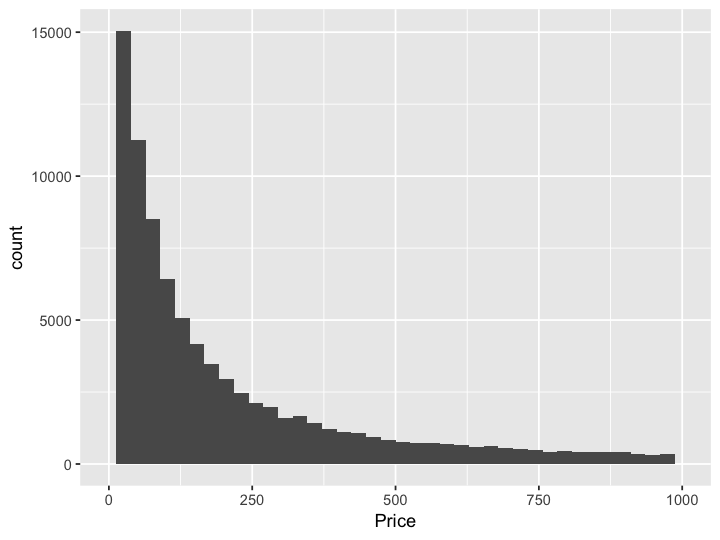

In [26]:
agora %>% 
    ggplot(aes(x = Price)) +
    geom_histogram(bins = 40) +
    xlim(c(0, 10^3))

The distribution is right-skewed. This means that the Price values highly assymmetric which makes sense in the real world. There will be a lot of items sold at a lower price but not so many items that being sold at a really high price. 

We can remove the right-skewness of the distribution by taking the log transformation.

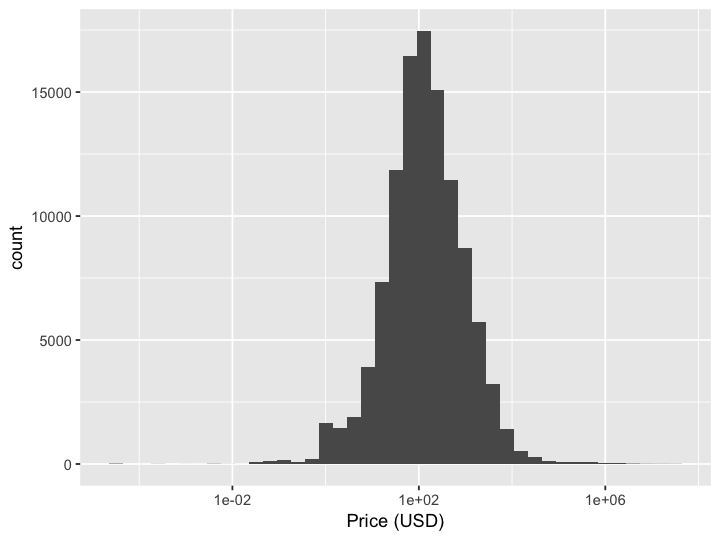

In [27]:
agora %>% 
    ggplot(aes(x = Price)) +
    geom_histogram(binwidth = 0.3) +
    scale_x_log10() +
    labs(x = "Price (USD)")

Let us plot the price distribution (in log scale) for all the categories. The distributions obtained are expected to be nearly normal since we are using the log transformation on prices and as we see, they are!

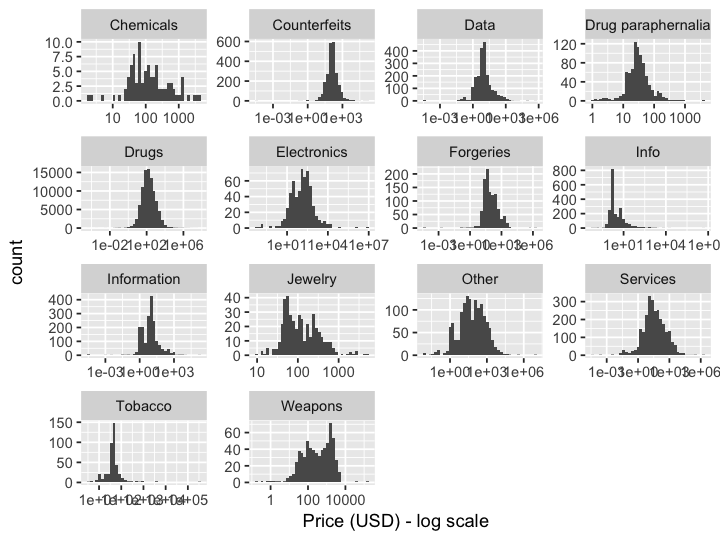

In [28]:
agora %>% 
    group_by(Category) %>% 
    ggplot(aes(x = Price)) +
    geom_histogram(bins = 40) +
    scale_x_log10() +
    labs(x = "Price (USD) - log scale") +
    facet_wrap(~ Category, scales = "free", ncol = 4)

Looking at what we have in the data, I am now really curious about what are the main points of origin and destination of these products. Let's figure it out!

In [29]:
suppressWarnings(origin <- countrycode(agora$Origin, "country.name", "iso2c") %>% 
                    as_tibble() %>% 
                    setNames("iso") %>% 
                    filter(!is.na(iso)))
suppressWarnings(dest <- countrycode(agora$Destination, "country.name", "iso2c") %>% 
                    as_tibble() %>% 
                    setNames("iso") %>% 
                    filter(!is.na(iso)))

Now we look at the counts of rows with different origins and destinations to see which areas are the most popular.

In [30]:
origin %>% 
    group_by(iso) %>% 
    summarise(freq = n()) %>% 
    filter(freq > 100) %>% 
    arrange(desc(freq)) %>% 
    mutate(prop = freq / sum(freq) * 100)

iso,freq,prop
US,34228,39.5269880
GB,10373,11.9788900
AU,8807,10.1704506
DE,8033,9.2766242
NL,7949,9.1796198
CA,5299,6.1193616
CN,4188,4.8363628
BE,1158,1.3372751
IN,1111,1.2829988
SE,1035,1.1952329


In [31]:
dest %>% 
    group_by(iso) %>% 
    summarise(freq = n()) %>% 
    filter(freq > 5) %>% 
    arrange(desc(freq)) %>% 
    mutate(prop = freq / sum(freq) * 100)

iso,freq,prop
US,18163,63.89572926
AU,5153,18.12777035
GB,2152,7.57053402
DE,1076,3.78526701
CA,540,1.89966932
FI,328,1.15387321
SE,300,1.05537184
CH,172,0.60507986
FR,157,0.55231126
NO,129,0.45380989


The US is way above any other country by comparison and is clearly the winner with about 40% of the market share in origin and 64% of the market share in destination (these are huge numbers, enough to conclude US as the king of this kingdom!). But we also have a lot of other interesting origin and destination countries to look at. We will try to plot these countries on the world map according to their frequency in the dataset. We will use map_data for this purpose which comes with ggplot2.

In [32]:
world_data <- map_data("world") %>% 
    as_tibble() %>% 
    mutate(iso = countrycode(region, "country.name", "iso2c"))


Attaching package: ‘maps’

The following object is masked from ‘package:purrr’:

    map

Warning message in countrycode(region, "country.name", "iso2c"):
“Some values were not matched unambiguously: Ascension Island, Azores, Barbuda, Bonaire, Canary Islands, Chagos Archipelago, Grenadines, Heard Island, Kosovo, Madeira Islands, Micronesia, Saba, Saint Martin, Siachen Glacier, Sint Eustatius, Virgin Islands
”

In [33]:
paste("Origin Countries")
(origin <- origin %>% 
    group_by(iso) %>% 
    summarise(freq = n()) %>% 
    filter(freq > 1000, iso != "US") %>% 
    arrange(desc(freq)))
paste("Destination Countries")
(dest <- dest %>% 
    group_by(iso) %>% 
    summarise(freq = n()) %>% 
    filter(freq > 50, iso != "US") %>% 
    arrange(desc(freq)))

[1] "Origin Countries"

iso,freq
GB,10373
AU,8807
DE,8033
NL,7949
CA,5299
CN,4188
BE,1158
IN,1111
SE,1035


[1] "Destination Countries"

iso,freq
AU,5153
GB,2152
DE,1076
CA,540
FI,328
SE,300
CH,172
FR,157
NO,129
IT,65


We will now perform a left outer join on the two tables. To understand more about joins look at [this awesome CheatSheet](http://stat545.com/bit001_dplyr-cheatsheet.html).

In [34]:
# Doing a left outer join on the two tables
origin_data <- left_join(world_data, origin, by = "iso") %>% 
    filter(!is.na(freq))
dest_data <- left_join(world_data, dest, by = "iso") %>% 
    filter(!is.na(freq))

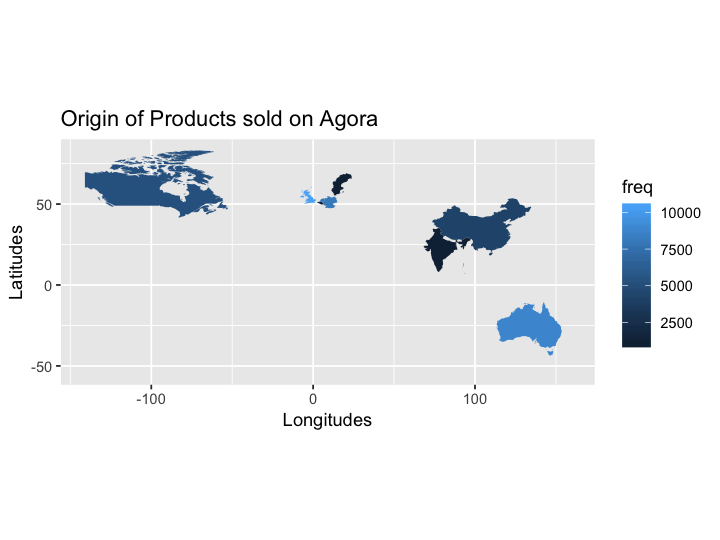

In [35]:
ggplot(origin_data, aes(long, lat)) +
    geom_polygon(aes(group = group, fill = freq)) +
    labs(x = "Longitudes", y = "Latitudes", title = "Origin of Products sold on Agora") +
    coord_equal()

After the USA, we have in line the Great Britain, Australia, Germany, Netherlands and Canada in that order in terms of the origin countries. Interesting!

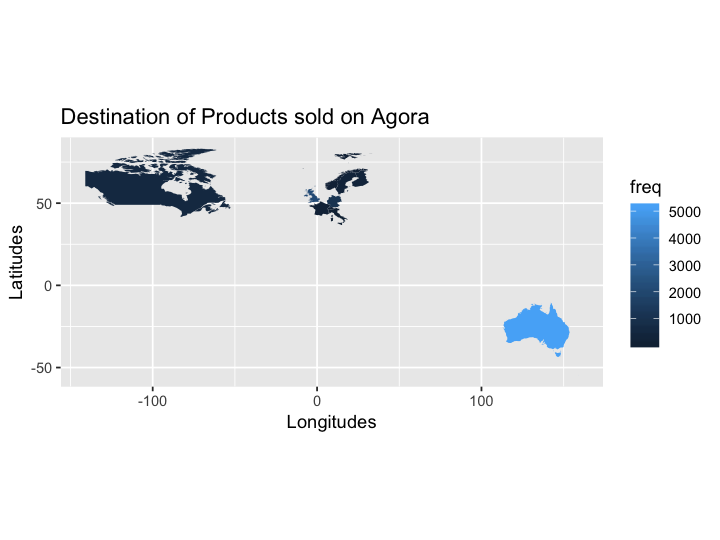

In [36]:
ggplot(dest_data, aes(long, lat)) +
    geom_polygon(aes(group = group, fill = freq)) +
    labs(x = "Longitudes", y = "Latitudes", title = "Destination of Products sold on Agora") +
    coord_equal()

Again in terms of the destination, we have Australia, the Great Britain, Germany and Canada in that order which is not a surprise I guess?

In [37]:
agora <- agora %>% 
    separate(Rating, into = c("Rating", "Max"), sep = "/") %>% 
    filter(!is.na(Max), Rating != ~5)   #just filtering out some gibberish values created

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 8307 rows [36, 187, 310, 335, 336, 339, 347, 372, 619, 1029, 1030, 1035, 1047, 1063, 1100, 1105, 1107, 1108, 1111, 1601, ...].”